<a href="https://colab.research.google.com/github/danilo-uea/RNA-2021.1-AA2.1/blob/main/RNA_AA_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Artificiais - Atividade Avaliativa 2.1


---


> Criado por: Danilo Frazão (1715080036), Rafael Aragão Morais (1915080022) & Yasser Tuma (1815310044)




## Importando as dependências


---



> Primeiramente, iremos instalar e importar as bibliotecas do python que serão utilizadas nesta atividade, as bibliotecas são: 

*   numpy;
*   random;
*   math;
*   matplotlib.pyplot; e
*   prettytable.






In [1]:
!pip install numpy
!pip install matplotlib
!pip install prettytable
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable

###Importando os dados

> O arquivo com os dados está armazenado na pasta data no próprio repositório, como é um arquivo em binario, iremos utilizar a biblioteca numpy para extrair os dados.



In [4]:
def import_data(path):
  dt = np.dtype(float)
  arq = np.fromfile(path, dtype=dt)

  ret = np.empty((0, 3), float)

  for i in range(0, len(arq), 3):
    linha = np.array([[arq[i], arq[i+1], arq[i+2]]])
    ret = np.append(ret, linha, axis=0)

  return ret


In [ ]:
path = "data/dataAll.txt"
data_All = import_data(path)


##Perceptron


> As funções abaixo compõem o treinamento, ajuste dos pesos, de um Perceptron e o seu teste.

*   perceptronLearning: recebe um vetor de pesos, um vetor de entrada, o limite de épocas, a taxa de aprendizado e o limiar da função de ativação.
*   epoch: 





In [6]:
def activationFunction(u, teta):
  if(u >= teta):
    return 1
  else:
    return 0

In [7]:
def sumFunction(X, W):
  sum = 0
  for x,w in zip(X,W):
    sum += x*w
  return sum

In [8]:
def weightAdjustment(W, n, e, X):
  delta = np.dot((n*e), X)
  new_weight = np.add(W, delta);
  return new_weight

In [9]:
def epoch(inputData, W, n, teta):
  adjusts = 0;
  weights = []
  for idx, row in enumerate(inputData):
    sum = sumFunction(row[:-1], W)
    yp = activationFunction(sum, teta)
    if(row[-1] != yp):
      adjusts += 1;
      W = weightAdjustment(W, n, (row[-1] - yp), row[:-1])
      weights.append((idx, W))
  return (adjusts, weights, W)



In [50]:
def perceptronLearning(inputData, W, maxEpoch, n, teta):
  epochCount = 0
  adjustCount = 0
  adjust = True
  while(adjust):
    epochCount += 1
    (numAdjusts, oldWeights, W) = epoch(inputData, W, n, teta)

    print("\nNumero da epoca: " + str(epochCount))
    print("Numero de ajustes: " + str(numAdjusts))
    
    adjustCount += numAdjusts
    
    if(numAdjusts == 0):
      adjust = False #nao houve alteracoes nos valores dos pesos
      print("Os pesos foram ajustados")
    else:
      print("Pesos antigos e a linha em que foram alterados")
      for weight in oldWeights:
        print(weight[1], " - linha: ", weight[0])
      if(epochCount == maxEpoch):
        print("O limite maximo de epocas foi alcancado e nao foi possivel ajustar os pessos corretamente")
        break

  print("\nPesos finais: ", W)
  print("Numero total de epocas: " + str(epochCount))
  print("Numero total de ajustes: " + str(adjustCount))
  return (W, epochCount, adjustCount)


In [11]:
def addBias(inputData, bias):
  nd= np.insert(inputData, 2, bias, axis=1)
  return nd


In [30]:
def perceptronTest(W, Xt, Yt, teta):
  tp = []
  tn = []
  fp = []
  fn = [] #true positive, true negative, false positive, false negative
  for row, yr in zip(Xt, Yt):
    sum = sumFunction(row[:-1], W)
    yp = activationFunction(sum, teta)
    result = (row, yp, yr)
    if(yp == yr):
      if(yp == 0):
        tp.append(result)
      else:
        tn.append(result)
    else:
      if(yp == 0):
        fp.append(result)
      else:
        fn.append(result)
  return (tp, tn, fp, fn)


# Parte I - Resolvendo um problema linearmente separavel



---



> Para esta parte, iremos utilizar o arquivo dataAll.txt;

> O neurônio perceptron terá as seguintes características:

*   Função de ativação degrau com limiar = 0,

*   Taxa de aprendizado = 0.1,

*   Os pesos das entradas inicialmente serão valores aleatórios no intervalo de -0.5 e 0.5 .








In [12]:
n_DataAll = 0.1 # taxa de aprendizado
teta_DataAll = 0 #degrau
w_DataAll = np.random.uniform(-0.5, 0.5, 3) #min, max, numero_de_valores
print("Vetor de pesos iniciais: ")
print(w_DataAll)
data_All = addBias(data_All, 1)
print("\n\nDados de entrada com o vies: \n [x1, x2, vies, y] \n")
data_All

Vetor de pesos iniciais: 
[ 0.34665584  0.00698912 -0.43776494]


Dados de entrada com o vies: 
 [x1, x2, vies, y] 



array([[-363.7884,  244.1423,    1.    ,    0.    ],
       [ 328.7572, -256.7658,    1.    ,    1.    ],
       [-164.9827,  613.2164,    1.    ,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ,    1.    ],
       [ 822.6894, -702.6489,    1.    ,    1.    ],
       [-140.147 ,  734.0983,    1.    ,    0.    ]])

## Realização do treinamento

> Será impresso o numero de ajustes, os pesos resultantes do ajuste e a linha em que foi necessario o ajuste para cada época. O ajuste dos pesos vai ocorrer até que ocorra uma época em que não houve nenhum ajuste ou até que o limite de épocas tenha sido atingido. Ao final, a função vai imprimir e retornar a lista dos últimos pesos que foram ajustados, o total de épocas e o total de ajustes.*texto em itálico* 



In [51]:
(finalWeights, num_epochs, num_adjusts) = perceptronLearning(data_All, w_DataAll, 0, n_DataAll, teta_DataAll)


Numero da epoca: 1
Numero de ajustes: 48
Pesos antigos e a linha em que foram alterados
[-53.31239416 -76.48876088  -0.53776494]  - linha:  3
[ 19.48362584 -40.65920088  -0.43776494]  - linha:  7
[102.08232584  39.19662912  -0.33776494]  - linha:  18
[107.92808584 -39.09796088  -0.43776494]  - linha:  26
[  67.91917584 -116.99065088   -0.53776494]  - linha:  31
[126.36209584 -75.41037088  -0.63776494]  - linha:  41
[  73.40203584 -132.27983088   -0.53776494]  - linha:  45
[132.96155584 -82.15750088  -0.63776494]  - linha:  47
[  87.43692584 -147.79343088   -0.53776494]  - linha:  71
[ 101.77535584 -138.40721088   -0.63776494]  - linha:  104
[192.49121584 -63.69389088  -0.73776494]  - linha:  107
[ 134.71022584 -124.00204088   -0.63776494]  - linha:  110
[  84.80040584 -175.26247088   -0.53776494]  - linha:  178
[ 112.62413584 -157.20755088   -0.43776494]  - linha:  197
[ 140.08772584 -136.35120088   -0.33776494]  - linha:  220
[  71.23204584 -206.42150088   -0.23776494]  - linha:  446

## Gráfico


> As funções abaixo irão imprimir um gráfico contendo todos os registros (linhas) do dataset, sendo os pontos vermelhos os registros da classe 0 e os pontos azuis pertencentes a classe 1. Como estes dados são linearmente separáveis, foi possível traçar uma linha separando-os.


In [35]:
def intervalo_x(dados_func):
  maximo = np.max(dados_func)
  minimo = np.min(dados_func)
  intervalo = maximo - minimo

  if (intervalo > 50):
    return np.arange(minimo, maximo, 1)
  elif (intervalo > 5):
    return np.arange(minimo, maximo, 0.1)
  else: 
    return np.arange(minimo, maximo, 0.01)

 

#grafico

def plotLine(inputData):
  h = []
  v = []

  plt.figure(figsize=(10, 10))

  for row in inputData:
    h.append(row[0])
    v.append(row[1])
    if(row[-1] == 0):
      plt.scatter(row[0], row[1], color='red')
    else:
      plt.scatter(row[0], row[1], color='blue')

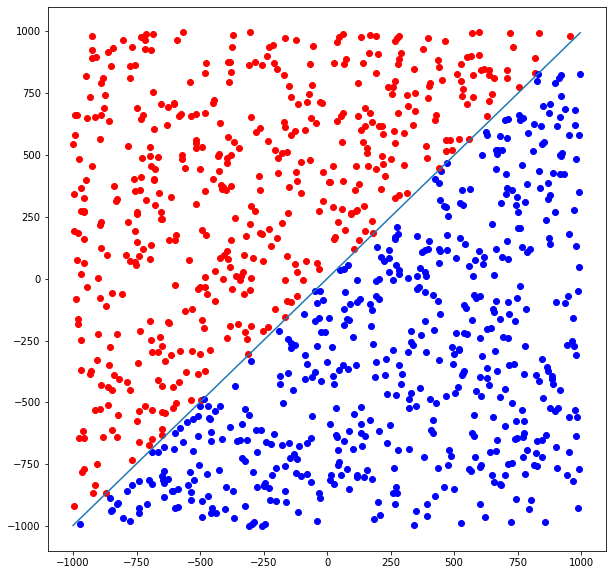

-0.0010799824309652374


In [139]:
plotLine(data_All)  
peso = np.flip(finalWeights)
x = intervalo_x(data_All) 
plt.plot(x, (peso[0]/peso[2]) - ((peso[1]/peso[2]) * x))
plt.show()
print (peso[0]/peso[2])



# Parte 2 - Experimentacao


---


> Para determinar qual arquivo iremos utilizar como dataset, iremos somar o ultimo digito de nossas matriculas, dividir por quatro e obter o resto, o resto da divisão irá determinar qual será o arquivo.


```
# (6 + 2 + 4) % 4 = 0
```


---



> Para esta parte, iremos utilizar o arquivo data0.txt;
> O neurônio perceptron terá as seguintes características:

*   Função de ativação degrau com limiar = 0,

*   Taxa de aprendizado = {0.4, 0.1, 0.01},

*   Os pesos das entradas inicialmente serão valores aleatórios no intervalo de {(-100,100) (-0.5 e 0.5)} ,



---



> Para cada combinação entre os possiveis valores da taxa de aprendizado e dos intervalos iniciais dos pesos, será realizada 10 iterações. Ao final iremos comparar a média, o desvio padrão e o menor número de épocas das iteraçòes que cada combinação fez.












In [ ]:
path2 = "data/data0.txt"
data0 = import_data(path2)
data0

array([[-0.00149369, -0.03581784,  0.        ],
       [ 0.01234945,  0.10249524,  0.        ],
       [ 0.13954598,  0.05607083,  0.        ],
       ...,
       [ 0.95751872,  1.0035204 ,  1.        ],
       [ 0.97981588,  1.00949493,  1.        ],
       [ 1.02021556,  0.86533059,  1.        ]])

In [21]:
def perceptronLearningPart2(inputData, W, maxEpoch, n, teta):
  epochCount = 0
  adjustCount = 0
  adjust = True
  while(adjust):
    epochCount += 1
    (numAdjusts, oldWeights, W) = epoch(inputData, W, n, teta)
    
    adjustCount += numAdjusts
    
    if(numAdjusts == 0):
      adjust = False #nao houve alteracoes nos valores dos pesos
    else:
        if(epochCount == maxEpoch):
          break
  return (W, epochCount, adjustCount)


### Função iteration


> Vai realizar um determinado número de iterações, em cada uma será realizada um treinamento de um perceptron com os parâmetros passados, sendo gerado aleatoriamente um novo vetor de pessos iniciais para cada um, a função irá retornar a média e o desvio padrão entre o número de ajustes realizados em cada época e a menor quantidade de épocas necessárias para treinamento de uma iteração.


In [144]:
def iteration(inputData, w_index, n, teta):
  minEpochs = 0
  adjusts = []
  inputData = addBias(inputData, 1)

  for i in range(10):
    if(w_index == 0):
      W = np.random.uniform(-100, 100, 3)
    else:
      W = np.random.uniform(-0.5, 0.5, 3)
    
    (finalWeights, num_epochs, num_adjusts) = perceptronLearningPart2(inputData, W, 0, n, teta)

    if(minEpochs > num_epochs or not adjusts):
      minEpochs = num_epochs

    adjusts.append(num_adjusts)

  return ((sum(adjusts) / 10), np.std(adjusts), minEpochs)


## Análise da tabela


> Análisando a tabela para diferentes iterações, foi possivel identificar que as melhores combinações tiveram os valores do vetor de pesos inicial variando entre {-100, 100}, sendo que quanto mais se diminui o valor da taxa de aprendizado, maior é a diferença entre o resultado das combinações dos intervalos de pesos.


In [145]:
PT = PrettyTable()

first_row = iteration(data0, 0, 0.4, 0)
second_row = iteration(data0, 1, 0.4, 0)
third_row = iteration(data0, 0, 0.1, 0)
fourth_row = iteration(data0, 1, 0.1, 0)
fifth_row = iteration(data0, 0, 0.01, 0)
sixth_row = iteration(data0, 1, 0.01, 0)

PT.field_names = ["Taxa de aprendizado", "Intervalo de pesos", "Media do numero de ajustes", "Desvio padrao do numero de ajustes", "Menor numero de epocas"]
PT.add_row(["n=0.4", "{-0.5, 0.5}", first_row[0], first_row[1], first_row[2]])
PT.add_row(["n=0.4", "{-100, 100}", second_row[0], second_row[1], second_row[2]])
PT.add_row(["n=0.1", "{-0.5, 0.5}", third_row[0], third_row[1], third_row[2]])
PT.add_row(["n=0.1", "{-100, 100}", fourth_row[0], fourth_row[1], fourth_row[2]])
PT.add_row(["n=0.01", "{-0.5, 0.5}", fifth_row[0], fifth_row[1], fifth_row[2]])
PT.add_row(["n=0.01", "{-100, 100}", sixth_row[0], sixth_row[1], sixth_row[2]])

print(PT)

+---------------------+--------------------+----------------------------+------------------------------------+------------------------+
| Taxa de aprendizado | Intervalo de pesos | Media do numero de ajustes | Desvio padrao do numero de ajustes | Menor numero de epocas |
+---------------------+--------------------+----------------------------+------------------------------------+------------------------+
|        n=0.4        |    {-0.5, 0.5}     |           321.6            |         167.94475282068206         |           3            |
|        n=0.4        |    {-100, 100}     |            8.9             |         2.7367864366808017         |           3            |
|        n=0.1        |    {-0.5, 0.5}     |           877.1            |         691.0643168331005          |           6            |
|        n=0.1        |    {-100, 100}     |            10.8            |         6.352952069707436          |           2            |
|        n=0.01       |    {-0.5, 0.5}     |    

# Parte 3 - Validação Holdout em Problema Não-Linearmente Separável


---


> Para esta parte, iremos utilizar o arquivo dataHoldout.txt;

> O neurônio perceptron terá as seguintes características:


*   Função de ativação degrau com limiar = 0;
*   Taxa de aprendizado = 0.1;
*   Limite de épocas = 100;
*   Os pesos das entradas inicialmente serão valores aleatórios no intervalo de -0.5 e 0.5.

---


> Neste parte, iremos utilizar a validação cruzada(Holdout) para avaliar a generalização do modelo, para isso iremos dividir o conjunto de dados em dados para treinamento (70% do total) e dados de teste(30% do total).


> Este dataset é não-linearmente separável, isso significa que não há como classificar corretamente os valores de entrada usando apenas um perceptron.















In [ ]:
path3 = "data/dataHoldout.txt"
dataHoldout = import_data(path3)
dataHoldout

array([[-0.00149369, -0.03581784,  0.        ],
       [ 0.01234945,  0.10249524,  0.        ],
       [ 0.13954598,  0.05607083,  0.        ],
       ...,
       [ 0.95751872,  1.0035204 ,  1.        ],
       [ 0.97981588,  1.00949493,  1.        ],
       [ 1.02021556,  0.86533059,  1.        ]])

## Preparação dos dados


> Iremos dividir o dataset em um conjunto de treino e um conjunto de teste, entretanto como os dados do dataset estão agrupados pelo atributo de classe, primeiro será necessario embaralhar as linhas do dataset



In [130]:
# embaralhar os dados
random.shuffle(dataHoldout)

print(dataHoldout)

[[-0.29322959 -0.09065359  1.        ]
 [ 0.07988839  0.21101297  1.        ]
 [-0.29322959 -0.09065359  1.        ]
 ...
 [ 0.71905781 -0.25871504  0.        ]
 [ 1.14753621  0.83215341  0.        ]
 [ 0.99646156  0.05810024  0.        ]]




> Depois de embaralhados, iremos parcionar o dataset, como ele tem um total de 800 linhas, o conjunto de treino terá 560 elementos e o conjunto de teste terá 240 elementos.





In [131]:
n_DataHouldout = 0.1 # taxa de aprendizado
teta_DataHouldout = 0 #degrau
w_DataHouldout = np.random.uniform(-0.5, 0.5, 3) #min, max, numero_de_valores
print("Vetor de pesos iniciais: ")
print(w_DataHouldout)
dataHoldout = addBias(dataHoldout, 1)
print("\n\nDados de entrada com o vies: \n [x1, x2, vies, y] \n")
dataHoldout



Vetor de pesos iniciais: 
[-0.29321337  0.47485904  0.05309335]


Dados de entrada com o vies: 
 [x1, x2, vies, y] 



array([[-0.29322959, -0.09065359,  1.        ,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ,  1.        ],
       [-0.29322959, -0.09065359,  1.        ,  1.        ],
       ...,
       [ 0.71905781, -0.25871504,  1.        ,  0.        ],
       [ 1.14753621,  0.83215341,  1.        ,  0.        ],
       [ 0.99646156,  0.05810024,  1.        ,  0.        ]])

In [132]:
lenDataHouldout = len(dataHoldout)
print("Tamanho do dataset: " + str(lenDataHouldout))
sliceIndex = len(dataHoldout)*0.7
print("Quantidade de elementos que vao compor o conjunto de treino (70\%): " + str(sliceIndex))
print("Quantidade de elementos que vao compor o conjunto de teste (30\%): " + str(lenDataHouldout - sliceIndex))

dataHoldout_train = dataHoldout[slice(0, int(sliceIndex))]
dataHoldout_test = dataHoldout[slice(int(sliceIndex), int(lenDataHouldout))]

print("\nConjunto de treino: \n")
print(dataHoldout_train)
print("\nConjunto de teste: \n")
print(dataHoldout_test)

Tamanho do dataset: 800
Quantidade de elementos que vao compor o conjunto de treino (70\%): 560.0
Quantidade de elementos que vao compor o conjunto de teste (30\%): 240.0

Conjunto de treino: 

[[-0.29322959 -0.09065359  1.          1.        ]
 [ 0.07988839  0.21101297  1.          1.        ]
 [-0.29322959 -0.09065359  1.          1.        ]
 ...
 [ 0.94034589  0.11076341  1.          0.        ]
 [ 0.22481021  1.51639247  1.          0.        ]
 [ 0.01047289 -0.025923    1.          1.        ]]

Conjunto de teste: 

[[ 2.58433709e-01 -1.23018548e-01  1.00000000e+00  1.00000000e+00]
 [ 9.44739287e-01 -1.31452337e-01  1.00000000e+00  0.00000000e+00]
 [-3.30001322e-01  7.23485438e-02  1.00000000e+00  1.00000000e+00]
 [ 4.63041417e-01  9.40547077e-02  1.00000000e+00  1.00000000e+00]
 [-2.94871985e-02  1.32165264e-01  1.00000000e+00  1.00000000e+00]
 [-8.48223271e-02  9.97802515e-01  1.00000000e+00  0.00000000e+00]
 [ 1.33710446e+00 -9.40090813e-02  1.00000000e+00  0.00000000e+00]
 [ 

## Ajuste de pesos do perceptron


> Como este dataset é não-linearmente separável, não haverá um momento em que os pesos não serão ajustados em uma época, então, será necessário parar o treinamento quando ele atingir o limite de 100 épocas. Os pesos resultantes não irão solucionar todos os exemplos.



In [133]:
(houldoutWeights, epochsHouldout, adjustsHouldout) = perceptronLearning(dataHoldout_train, w_DataHouldout, 100, n_DataHouldout, teta_DataHouldout)


Numero da epoca: 1
Numero de ajustes: 39
Pesos antigos e a linha em que foram alterados
[-0.24690922  0.48426451  0.15309335]  - linha:  7
[-0.22689564  0.44260683  0.25309335]  - linha:  38
[-0.26760929  0.30379567  0.15309335]  - linha:  214
[-0.28216457  0.23282489  0.05309335]  - linha:  219
[-0.24151826  0.21591972  0.15309335]  - linha:  220
[-0.17549148  0.19472864  0.25309335]  - linha:  223
[-0.14557855  0.1164612   0.15309335]  - linha:  224
[-0.12318536  0.03483195  0.05309335]  - linha:  233
[-0.12297605 -0.09692928 -0.04690665]  - linha:  236
[-0.10836974 -0.07916724  0.05309335]  - linha:  237
[-0.07974896 -0.18510374 -0.04690665]  - linha:  241
[-0.04465177 -0.1840797   0.05309335]  - linha:  242
[-0.037623   -0.14502339  0.15309335]  - linha:  246
[-0.01879446 -0.23022575  0.05309335]  - linha:  251
[-0.04429904 -0.20423048  0.15309335]  - linha:  257
[-0.01438611 -0.28249793  0.05309335]  - linha:  288
[ 0.0092919  -0.24496627  0.15309335]  - linha:  289
[-0.07951222 

## Teste dos valores


> Com um vetor de pesos obtido, iremos utilizar estes pesos nos dados do conjunto de testes, exemplo em que ele não foi exposto durante o treinamento, para determinar a sua generalização para qualquer entrada.


---

> Após o processo de teste, foram-se obtidos os valores de Verdadeiro Positivo(tp) e Verdadeiro Negativo (tn), elementos que foram corretamente classificados, e os valores de False Positivo (fp) e False Negativo (fn), elementos que não foram devidamente classificados.

### Matriz de Confusão

> Foi feita uma matriz de confusão para demonstrar estes valores.






In [135]:
(tp, tn, fp, fn) = perceptronTest(houldoutWeights, dataHoldout_test, dataHoldout_test[:,3], teta_DataHouldout)

(tp, tn, fp, fn) = (len(tp), len(tn), len(fp), len(fn))

confusionMatrix = PrettyTable()
confusionMatrix.field_names= ["","Positivo", "Negativo"]
confusionMatrix.add_row(["Verdadeiro", tp, tn])
confusionMatrix.add_row(["Falso", fp, fn])

print(confusionMatrix)

+------------+----------+----------+
|            | Positivo | Negativo |
+------------+----------+----------+
| Verdadeiro |   179    |    48    |
|   Falso    |    4     |    9     |
+------------+----------+----------+


### Métricas de medição


> As métricas de precisão são usadas para avaliar um modelo.



*   Acurácia: Demonstra a proporção dos casos classificados corretamente pelo total de casos;

*   Precisão: Demonstra a proporção dos valores classificados corretamente como positivos pelo total de valores positivos;

*   Revocação: Demonstra a fração de todos os Verdadeiros Positivos dentre todos os positivos;

*   F-Score: Demonstra a média harmônica entre a Precisão e a Revocação.





In [136]:
#acuracia
accuracy = (tp + tn) / (tp + tn + fp + fn)
#precisao
precision = tp / (tp + fp)

# revocacao
recall = tp / (tp + fn)

#f-score
FScore = 2 * ((precision * recall) / (precision + recall))

metrics = PrettyTable()
metrics.field_names= ["Metrica", "Valor"]
metrics.add_row(["Acuracia", accuracy])
metrics.add_row(["Precisao", precision])
metrics.add_row(["Revocacao", recall])
metrics.add_row(["F-Score", FScore])
print(metrics)

+-----------+--------------------+
|  Metrica  |       Valor        |
+-----------+--------------------+
|  Acuracia | 0.9458333333333333 |
|  Precisao | 0.9781420765027322 |
| Revocacao | 0.9521276595744681 |
|  F-Score  | 0.9649595687331537 |
+-----------+--------------------+




> Analizando a matriz de confusão, podemos observar que o modelo classificou corretamente a maioria das classes, e podemos ver que as métricas apresentaram valores altos, demonstrando um bom desempenho do modelo para classificar as classes, apresentando em média um F-Score acima de 90%.



### Tabelas

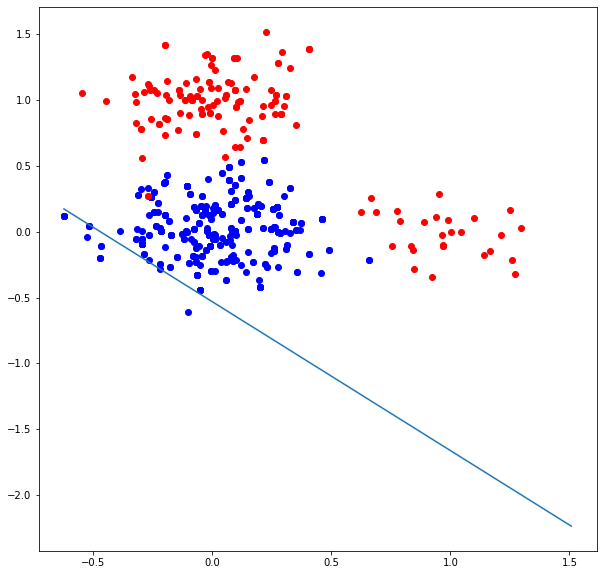

-0.531050599093486


In [137]:
plotLine(dataHoldout_train)  
peso = np.flip(houldoutWeights)
x = intervalo_x(dataHoldout_train) 
plt.plot(x, (peso[0]/peso[2]) - ((peso[1]/peso[2]) * x))
plt.show()
print (peso[0]/peso[2])



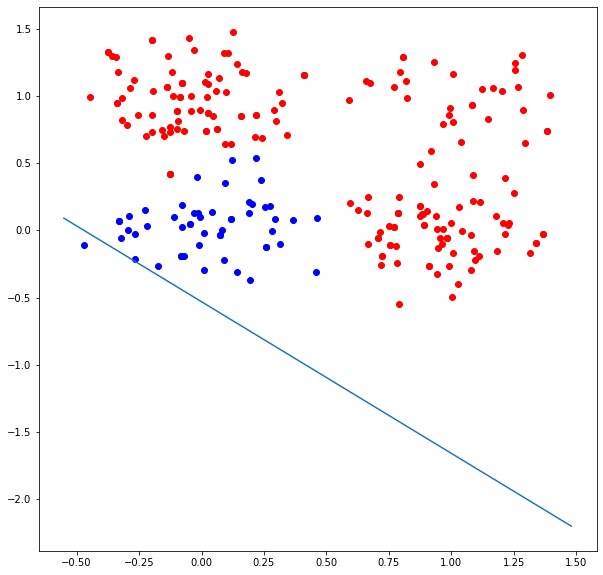

-0.531050599093486


In [138]:
plotLine(dataHoldout_test)  
peso = np.flip(houldoutWeights)
x = intervalo_x(dataHoldout_test) 
plt.plot(x, (peso[0]/peso[2]) - ((peso[1]/peso[2]) * x))
plt.show()
print (peso[0]/peso[2])

